In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
from vae import VAE

import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [81]:
!tree lightning_logs

lightning_logs
└── version_0
    ├── checkpoints
    │   └── epoch=57.ckpt
    ├── events.out.tfevents.1598564386.beast.18931.0
    └── hparams.yaml

2 directories, 3 files


In [145]:
vae = VAE.load_from_checkpoint("lightning_logs/version_0/checkpoints/epoch=98.ckpt")
vae.eval();

In [146]:
ds = CIFAR10("data", train=False, transform=T.ToTensor())

In [147]:
example = 4

In [148]:
img = ds[example][0]
with torch.no_grad():
    mu = vae.encode(img.unsqueeze(0))[0]
    reconst = vae.decode(mu).squeeze()

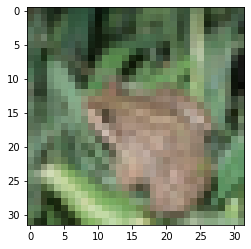

In [149]:
plt.imshow(img.permute(1, 2, 0).numpy())

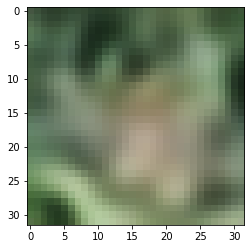

In [150]:
plt.imshow(reconst.permute(1, 2, 0).numpy())

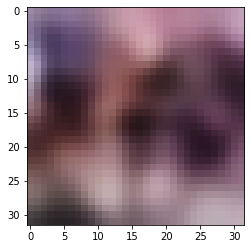

In [151]:
with torch.no_grad():
    z = torch.randn_like(mu)
    gen = vae.decode(z).squeeze()
    
plt.imshow(gen.permute(1, 2, 0).numpy())